Missing values in 'Core Temperature': 0
                               SARIMAX Results                                
Dep. Variable:       Core Temperature   No. Observations:                  436
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -840.095
Date:                Thu, 12 Dec 2024   AIC                           1692.189
Time:                        19:04:07   BIC                           1716.642
Sample:                             0   HQIC                          1701.840
                                - 436                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0250      0.051     -0.494      0.621      -0.124       0.074
ar.L2         -0.0285      0.092     -0.311      0.756      -0.208       0.151
ar.L3       

C:\Users\rohit\AppData\Local\Temp\ipykernel_9688\1633061185.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Core Temperature'].fillna(method='ffill', inplace=True)
C:\Users\rohit\AppData\Local\Temp\ipykernel_9688\1633061185.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Core Temperature'].fillna(method='ffill', inplace=True)


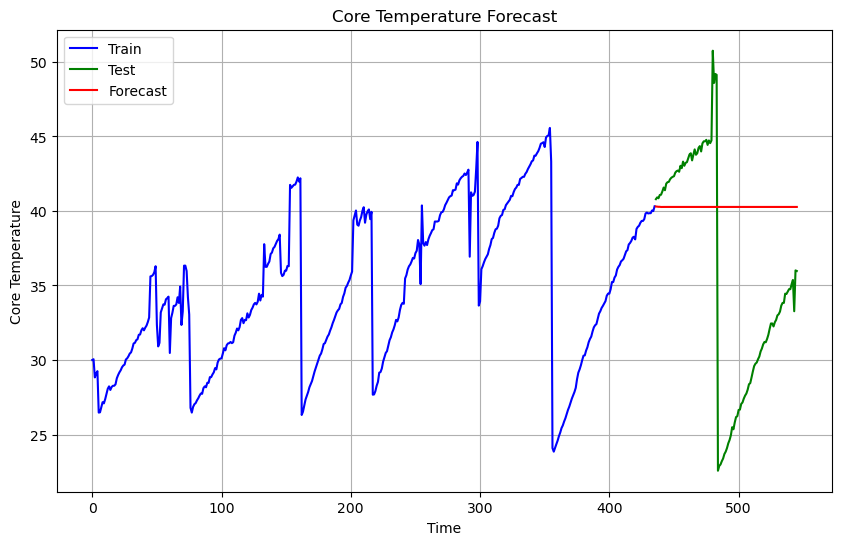

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv('project_25.csv')

# Check for missing values in the 'Core Temperature' column
print(f"Missing values in 'Core Temperature': {df['Core Temperature'].isnull().sum()}")

# Fill missing values using forward fill method (you can also use mean or interpolation)
df['Core Temperature'].fillna(method='ffill', inplace=True)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)  # Use 80% of data for training
train, test = df['Core Temperature'][:train_size], df['Core Temperature'][train_size:]

# Fit the ARIMA model (order=(p, d, q)) where p=AR, d=I, q=MA
model = ARIMA(train, order=(5, 1, 0))  # Example ARIMA model with p=5, d=1, q=0
model_fit = model.fit()

# Print the ARIMA model summary
print(model_fit.summary())

# Forecast the next values (same length as the test set)
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics like Mean Absolute Error (MAE)
mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error: {mae}")

# Plot the training, test, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Core Temperature Forecast')
plt.xlabel('Time')
plt.ylabel('Core Temperature')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_9688\490086657.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Core Temperature'].fillna(method='ffill', inplace=True)
C:\Users\rohit\AppData\Local\Temp\ipykernel_9688\490086657.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Core Temperature'].fillna(method='ffill', inplace=True)


Missing values in 'Core Temperature': 0
                               SARIMAX Results                                
Dep. Variable:       Core Temperature   No. Observations:                  436
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -840.095
Date:                Thu, 12 Dec 2024   AIC                           1692.189
Time:                        19:05:17   BIC                           1716.642
Sample:                             0   HQIC                          1701.840
                                - 436                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0250      0.051     -0.494      0.621      -0.124       0.074
ar.L2         -0.0285      0.092     -0.311      0.756      -0.208       0.151
ar.L3       

Enter the number of future time steps for forecasting:  20


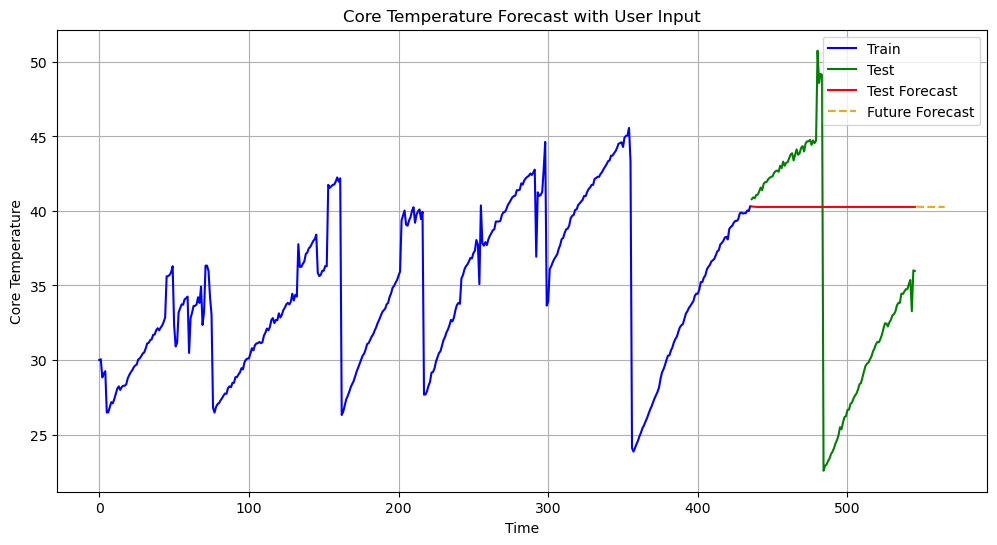

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv('project_25.csv')

# Check for missing values in the 'Core Temperature' column
print(f"Missing values in 'Core Temperature': {df['Core Temperature'].isnull().sum()}")

# Fill missing values using forward fill method (you can also use mean or interpolation)
df['Core Temperature'].fillna(method='ffill', inplace=True)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df['Core Temperature'][:train_size], df['Core Temperature'][train_size:]

# Fit the ARIMA model (order=(p, d, q)) where p=AR, d=I, q=MA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Print the ARIMA model summary
print(model_fit.summary())

# Forecast for the test set
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics like Mean Absolute Error (MAE)
mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error: {mae}")

# User input for prediction steps
future_steps = int(input("Enter the number of future time steps for forecasting: "))

# Extend forecast for user-defined steps
future_forecast = model_fit.forecast(steps=future_steps)

# Create an extended index for the forecast
extended_index = list(range(len(train) + len(test), len(train) + len(test) + future_steps))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, forecast, label='Test Forecast', color='red')
plt.plot(extended_index, future_forecast, label='Future Forecast', color='orange', linestyle='--')
plt.title('Core Temperature Forecast with User Input')
plt.xlabel('Time')
plt.ylabel('Core Temperature')
plt.legend()
plt.grid(True)

plt.show()


In [4]:
df.head()

,Timestamp,Ambient Temperature,Core Temperature,Voltage,Output,Unnamed: 5
0,11-12-2024 0:37:36,27.00,30.00,0.0,0.0,NaN
1,11-12-2024 0:38:45,27.51,30.05,0.0,0.0,NaN
2,11-12-2024 0:39:08,27.75,28.83,0.0,0.0,NaN
3,11-12-2024 0:39:31,27.85,29.09,0.0,0.0,NaN
4,11-12-2024 0:39:55,27.91,29.25,0.0,0.0,NaN


Missing values in 'Core Temperature': 0


C:\Users\rohit\AppData\Local\Temp\ipykernel_17396\243139647.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Core Temperature'].fillna(method='ffill', inplace=True)
C:\Users\rohit\AppData\Local\Temp\ipykernel_17396\243139647.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Core Temperature'].fillna(method='ffill', inplace=True)


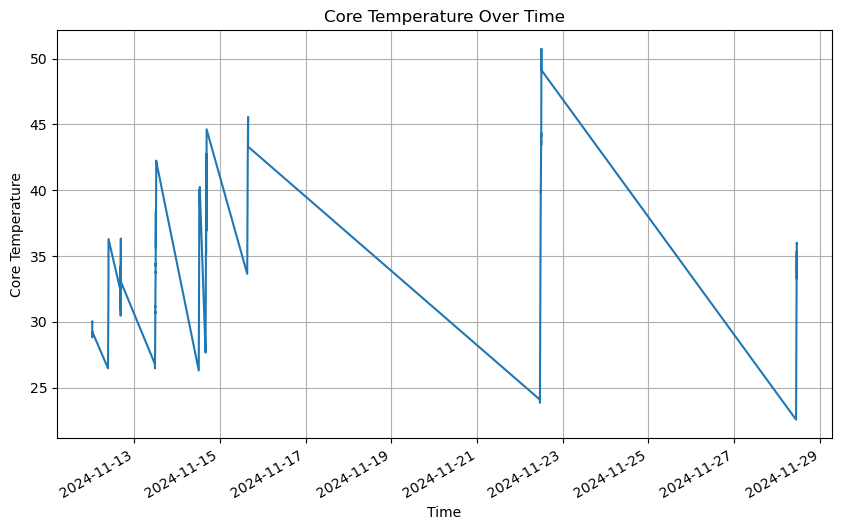

C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

                               SARIMAX Results                                
Dep. Variable:       Core Temperature   No. Observations:                  436
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -840.095
Date:                Mon, 09 Dec 2024   AIC                           1692.189
Time:                        14:12:35   BIC                           1716.642
Sample:                             0   HQIC                          1701.840
                                - 436                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0250      0.051     -0.494      0.621      -0.124       0.074
ar.L2         -0.0285      0.092     -0.311      0.756      -0.208       0.151
ar.L3         -0.0173      0.201     -0.086      0.9

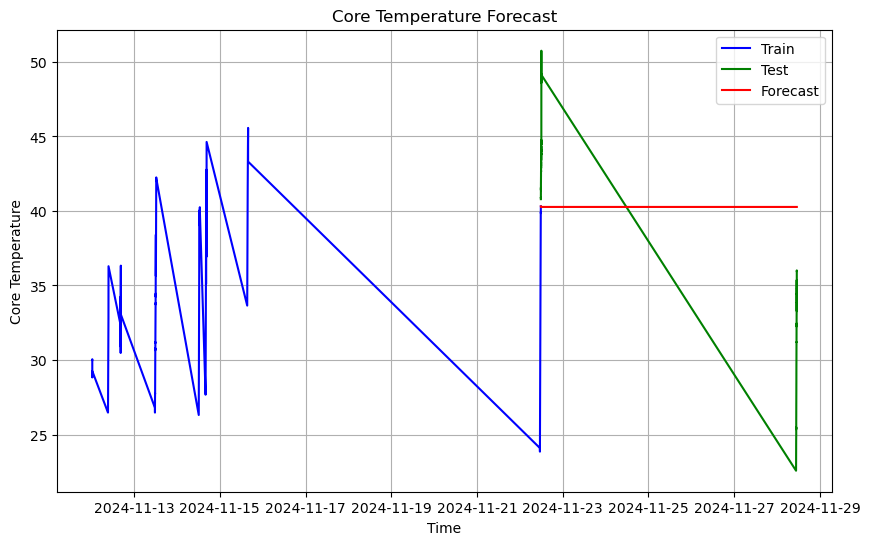

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv('project_25.csv')

# Convert timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the 'Timestamp' column as the index
df.set_index('Timestamp', inplace=True)

# Check for missing values in the 'Core Temperature' column
print(f"Missing values in 'Core Temperature': {df['Core Temperature'].isnull().sum()}")

# Fill missing values using forward fill method (or other methods like mean or interpolation)
df['Core Temperature'].fillna(method='ffill', inplace=True)

# Visualizing the data (optional)
df['Core Temperature'].plot(figsize=(10, 6))
plt.title("Core Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("Core Temperature")
plt.grid(True)
plt.show()

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)  # 80% of data for training
train, test = df['Core Temperature'][:train_size], df['Core Temperature'][train_size:]

# Fit the ARIMA model (order=(p, d, q)) where p=AR, d=I, q=MA
model = ARIMA(train, order=(5, 1, 0))  # Example ARIMA model with p=5, d=1, q=0
model_fit = model.fit()

# Print the ARIMA model summary
print(model_fit.summary())

# Forecast the next values (same length as the test set)
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate performance metrics like Mean Absolute Error (MAE)
mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error: {mae}")

# Plot the training, test, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Core Temperature Forecast')
plt.xlabel('Time')
plt.ylabel('Core Temperature')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_9688\2732632410.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\roh

                               SARIMAX Results                                
Dep. Variable:                 Output   No. Observations:                  436
Model:               SARIMAX(5, 1, 0)   Log Likelihood                 464.670
Date:                Thu, 12 Dec 2024   AIC                           -915.340
Time:                        19:10:06   BIC                           -886.813
Sample:                             0   HQIC                          -904.081
                                - 436                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Core Temperature     0.0374      0.001     50.037      0.000       0.036       0.039
ar.L1               -0.0712      0.083     -0.861      0.389      -0.233       0.091
ar.L2               -0.0516 

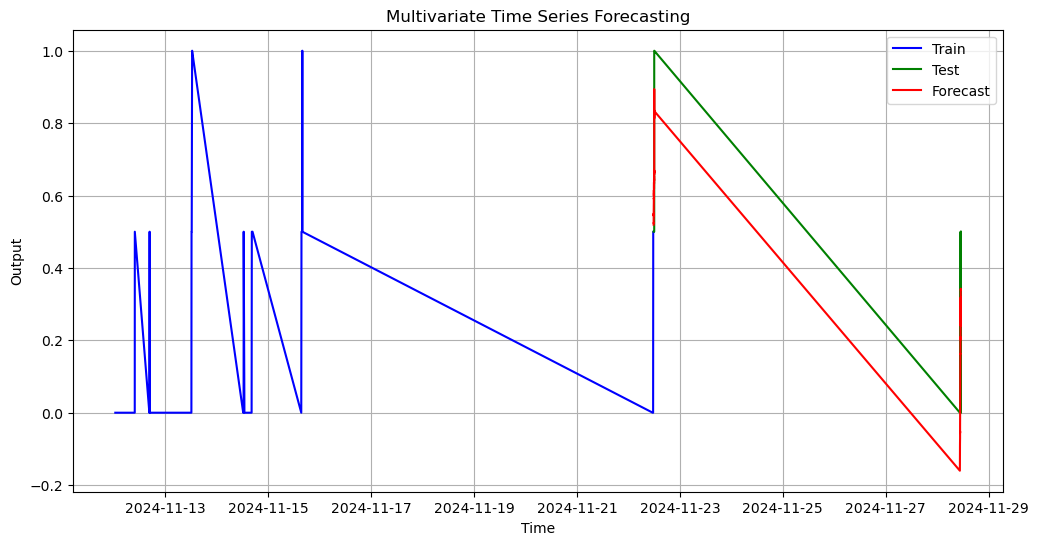

In [7]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('project_25.csv', parse_dates=['Timestamp'], index_col='Timestamp')

# Check for missing values and fill them
df.fillna(method='ffill', inplace=True)

# Select the input (Core Temperature) and output (Output parameter)
X = df['Core Temperature']
y = df['Output']

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fit the ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(5, 1, 0))  # Example parameters for ARIMAX
model_fit = model.fit()

# Print the summary
print(model_fit.summary())

# Forecast for the test set
forecast = model_fit.forecast(steps=len(X_test), exog=X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, forecast)
print(f"Mean Absolute Error: {mae}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Train', color='blue')
plt.plot(y_test.index, y_test, label='Test', color='green')
plt.plot(y_test.index, forecast, label='Forecast', color='red')
plt.title('Multivariate Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_9688\3783363973.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\roh

                               SARIMAX Results                                
Dep. Variable:                 Output   No. Observations:                  436
Model:               SARIMAX(5, 1, 0)   Log Likelihood                 464.670
Date:                Thu, 12 Dec 2024   AIC                           -915.340
Time:                        19:12:39   BIC                           -886.813
Sample:                             0   HQIC                          -904.081
                                - 436                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Core Temperature     0.0374      0.001     50.037      0.000       0.036       0.039
ar.L1               -0.0712      0.083     -0.861      0.389      -0.233       0.091
ar.L2               -0.0516 

Enter future Core Temperature values separated by commas (or leave blank for auto-generated):  10


C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


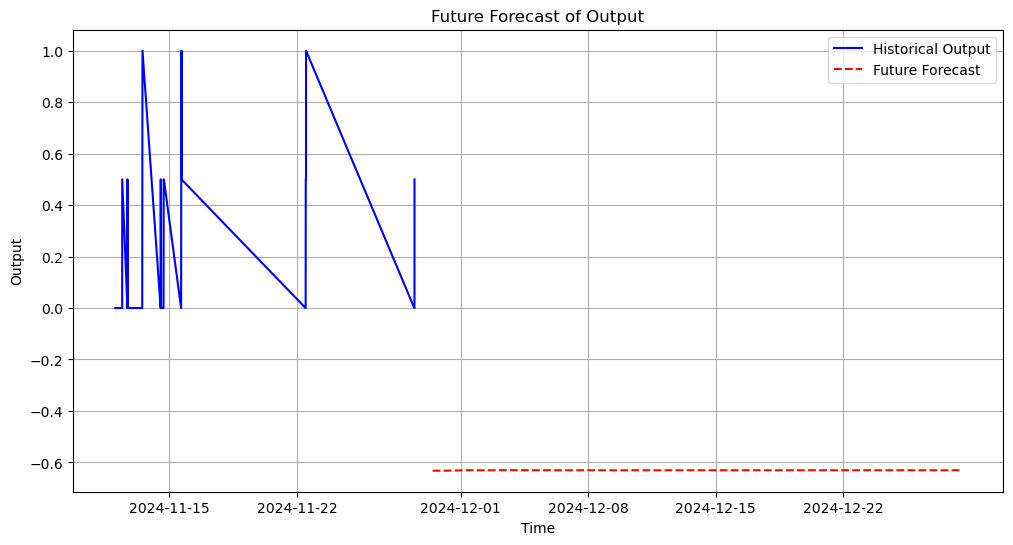

In [10]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv('project_25.csv', parse_dates=['Timestamp'], index_col='Timestamp')

# Check for missing values and fill them
df.fillna(method='ffill', inplace=True)

# Select the input (Core Temperature) and output (Output parameter)
X = df['Core Temperature']
y = df['Output']

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fit the ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(5, 1, 0))  # Example parameters for ARIMAX
model_fit = model.fit()

# Print the summary
print(model_fit.summary())

# Forecast for the test set
forecast = model_fit.forecast(steps=len(X_test), exog=X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, forecast)
print(f"Mean Absolute Error: {mae}")

# User input for future Core Temperature
future_steps = 30  # Predict for 30 days
user_input = input("Enter future Core Temperature values separated by commas (or leave blank for auto-generated): ")

if user_input.strip():
    # Parse user input
    future_core_temp = [float(value.strip()) for value in user_input.split(",")]
    if len(future_core_temp) != future_steps:
        print(f"Warning: Expected {future_steps} values, but got {len(future_core_temp)}. Padding with last known value.")
        future_core_temp.extend([future_core_temp[-1]] * (future_steps - len(future_core_temp)))
else:
    # Auto-generate future Core Temperature values (e.g., repeating the last known value)
    future_core_temp = [X.iloc[-1]] * future_steps
    print(f"Auto-generated Core Temperature values: {future_core_temp}")

# Create DataFrame for future Core Temperature
future_index = pd.date_range(start=X.index[-1], periods=future_steps + 1, freq='D')[1:]
future_core_temp_series = pd.Series(future_core_temp, index=future_index)

# Predict future Output based on future Core Temperature
future_forecast = model_fit.forecast(steps=future_steps, exog=future_core_temp_series)

# Plot historical data and future forecast
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Historical Output', color='blue')
plt.plot(future_index, future_forecast, label='Future Forecast', color='red', linestyle='--')
plt.title('Future Forecast of Output')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_9688\1236479084.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\roh

                               SARIMAX Results                                
Dep. Variable:                 Output   No. Observations:                  436
Model:               SARIMAX(5, 1, 0)   Log Likelihood                 464.670
Date:                Thu, 12 Dec 2024   AIC                           -915.340
Time:                        19:15:35   BIC                           -886.813
Sample:                             0   HQIC                          -904.081
                                - 436                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Core Temperature     0.0374      0.001     50.037      0.000       0.036       0.039
ar.L1               -0.0712      0.083     -0.861      0.389      -0.233       0.091
ar.L2               -0.0516 

Enter future Core Temperature values separated by commas (or leave blank for auto-generated):  31,52


C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


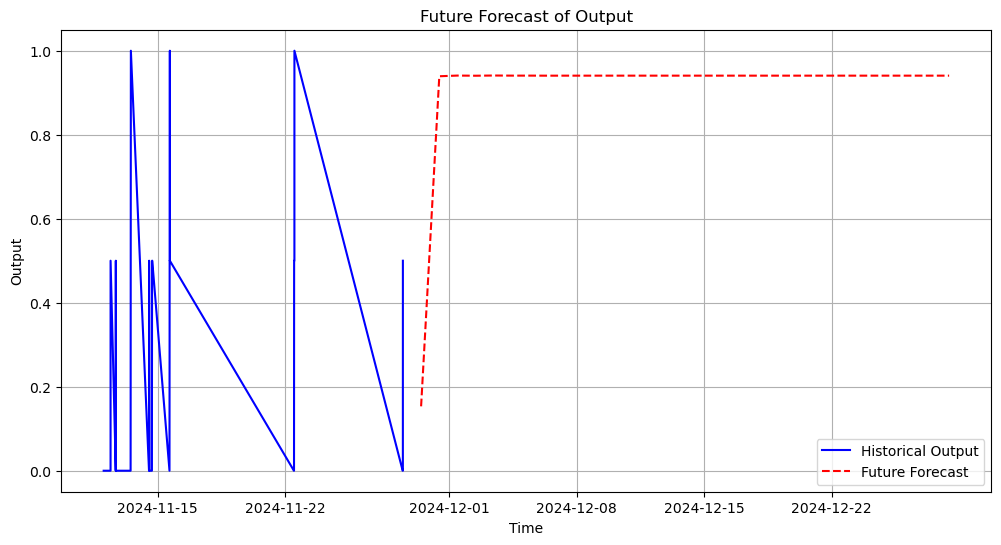

In [14]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv('project_25.csv', parse_dates=['Timestamp'], index_col='Timestamp')

# Check for missing values and fill them
df.fillna(method='ffill', inplace=True)

# Select the input (Core Temperature) and output (Output parameter)
X = df['Core Temperature']
y = df['Output']

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fit the ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(5, 1, 0))  # Example parameters for ARIMAX
model_fit = model.fit()

# Print the summary
print(model_fit.summary())

# Forecast for the test set
forecast = model_fit.forecast(steps=len(X_test), exog=X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, forecast)
print(f"Mean Absolute Error: {mae}")

# User input for future Core Temperature
future_steps = 30  # Predict for 30 days
user_input = input("Enter future Core Temperature values separated by commas (or leave blank for auto-generated): ")

if user_input.strip():
    # Parse user input
    future_core_temp = [float(value.strip()) for value in user_input.split(",")]
    if len(future_core_temp) != future_steps:
        print(f"Warning: Expected {future_steps} values, but got {len(future_core_temp)}. Padding with last known value.")
        future_core_temp.extend([future_core_temp[-1]] * (future_steps - len(future_core_temp)))
else:
    # Auto-generate future Core Temperature values with a linear trend
    last_temp = X.iloc[-1]
    trend = np.linspace(last_temp, last_temp + 5, future_steps)  # Linear increase of 5 degrees over 30 days
    future_core_temp = trend.tolist()
    print(f"Auto-generated Core Temperature values: {future_core_temp}")

# Create DataFrame for future Core Temperature
future_index = pd.date_range(start=X.index[-1], periods=future_steps + 1, freq='D')[1:]
future_core_temp_series = pd.Series(future_core_temp, index=future_index)

# Predict future Output based on future Core Temperature
future_forecast = model_fit.forecast(steps=future_steps, exog=future_core_temp_series)

# Plot historical data and future forecast
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Historical Output', color='blue')
plt.plot(future_index, future_forecast, label='Future Forecast', color='red', linestyle='--')
plt.title('Future Forecast of Output')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()


LSTM

C:\Users\rohit\AppData\Local\Temp\ipykernel_32096\3569052145.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Core Temperature'].fillna(method='ffill', inplace=True)
C:\Users\rohit\AppData\Local\Temp\ipykernel_32096\3569052145.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Core Temperature'].fillna(method='ffill', inplace=True)
C:\Users\rohit\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: U

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1261
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0175
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0105
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0086
Epoch 15/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0101
Epoch 16/50
14/14

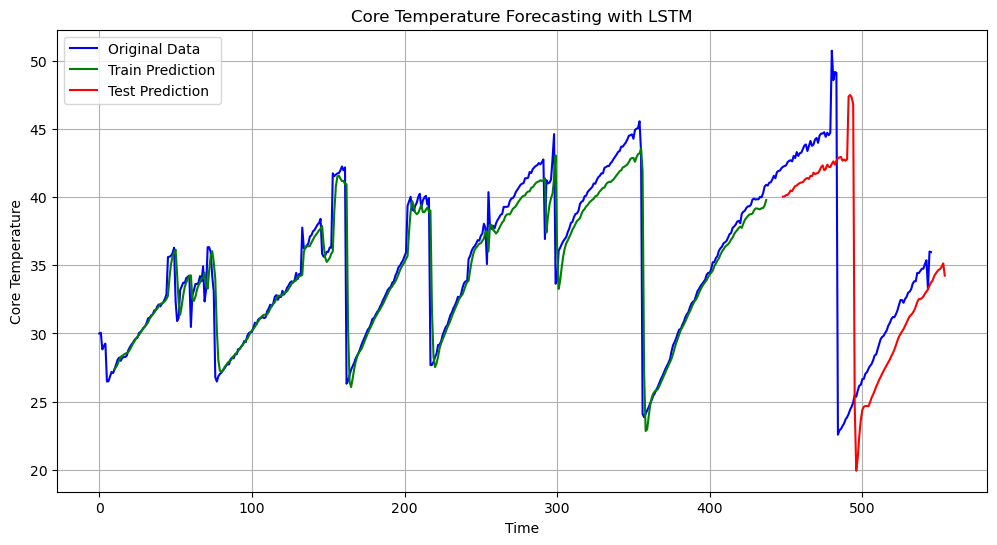

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv('project_25.csv')

# Check for missing values and handle them
df['Core Temperature'].fillna(method='ffill', inplace=True)

# Normalize the data (LSTM works better with scaled data)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['Core Temperature'].values.reshape(-1, 1))

# Prepare data for LSTM (time-series supervised learning)
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Define the time step (number of past observations used to predict the future)
time_step = 10  # Example: use the last 10 observations

# Create the dataset
X, Y = create_dataset(data_scaled, time_step)

# Reshape input data to [samples, time steps, features] as required by LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, test_predict)
print(f"Mean Absolute Error: {mae}")

# Plot the results
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(scaler.inverse_transform(data_scaled), label='Original Data', color='blue')
plt.plot(range(time_step, len(train_predict) + time_step), train_predict, label='Train Prediction', color='green')

# Plot test data and predictions
test_start = len(train_predict) + (2 * time_step)
plt.plot(range(test_start, test_start + len(test_predict)), test_predict, label='Test Prediction', color='red')

plt.title('Core Temperature Forecasting with LSTM')
plt.xlabel('Time')
plt.ylabel('Core Temperature')
plt.legend()
plt.grid(True)
plt.show()


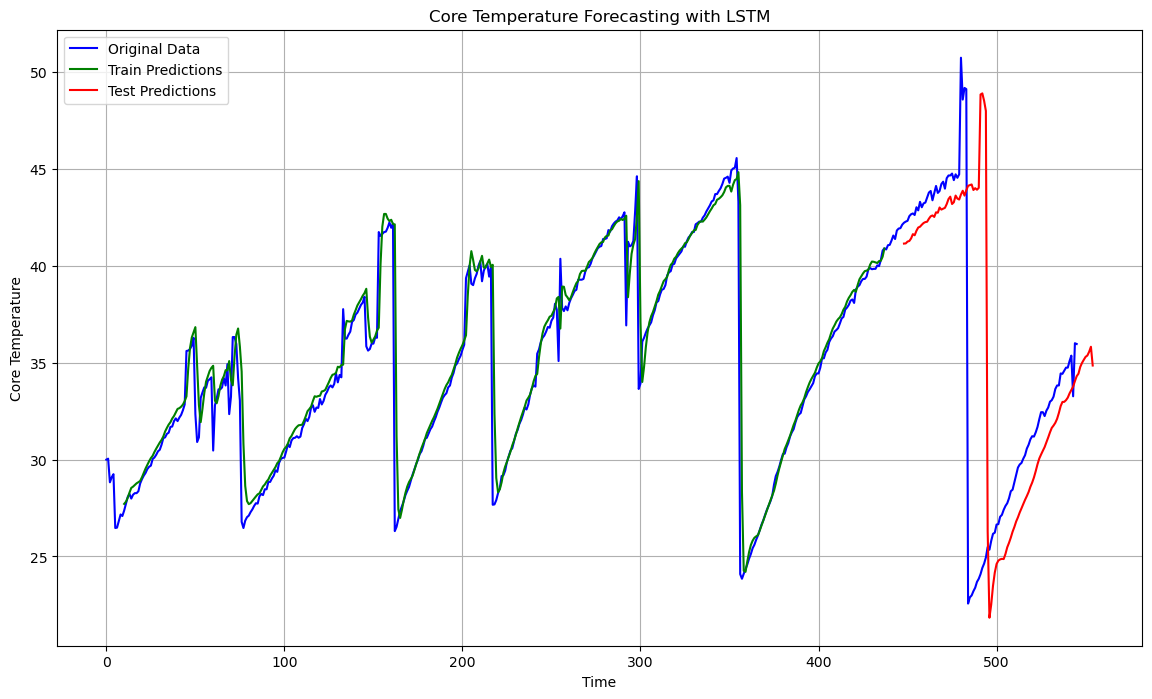

In [2]:
# Visualize the results
plt.figure(figsize=(14, 8))

# Plot the original data
plt.plot(scaler.inverse_transform(data_scaled), label='Original Data', color='blue')

# Plot training predictions
plt.plot(range(time_step, len(train_predict) + time_step), train_predict, label='Train Predictions', color='green')

# Plot testing predictions
test_start = len(train_predict) + (2 * time_step)
plt.plot(range(test_start, test_start + len(test_predict)), test_predict, label='Test Predictions', color='red')

plt.title('Core Temperature Forecasting with LSTM')
plt.xlabel('Time')
plt.ylabel('Core Temperature')
plt.legend()
plt.grid(True)
plt.show()


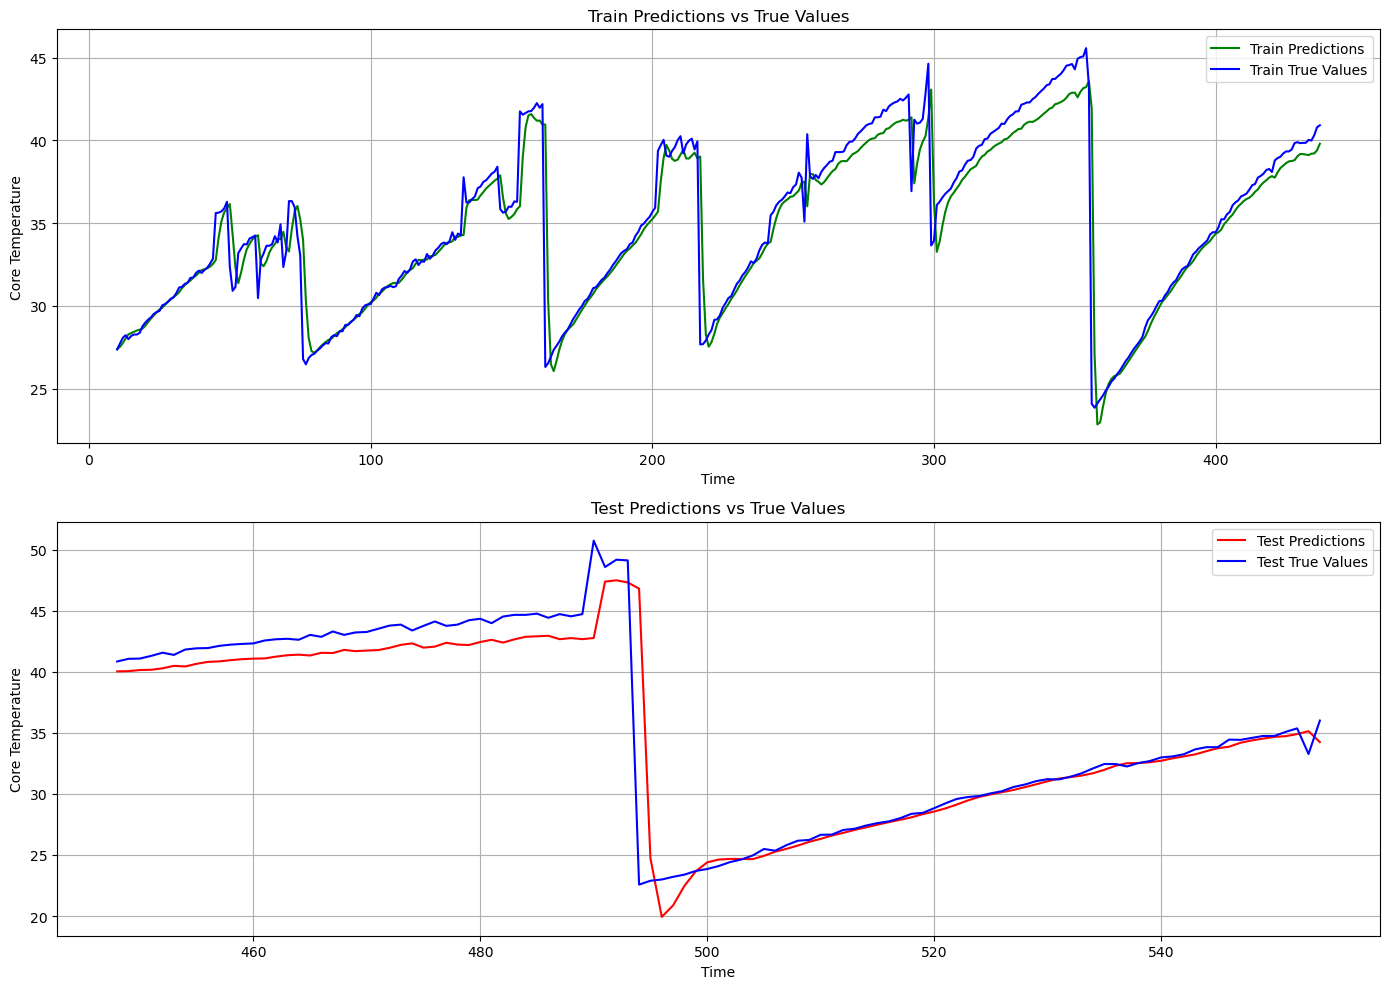

In [2]:
# Separate plots for training and testing predictions
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Training predictions
ax[0].plot(range(time_step, len(train_predict) + time_step), train_predict, label='Train Predictions', color='green')
ax[0].plot(range(time_step, len(Y_train) + time_step), Y_train, label='Train True Values', color='blue')
ax[0].set_title('Train Predictions vs True Values')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Core Temperature')
ax[0].legend()
ax[0].grid(True)

# Testing predictions
test_start = len(train_predict) + (2 * time_step)
ax[1].plot(range(test_start, test_start + len(test_predict)), test_predict, label='Test Predictions', color='red')
ax[1].plot(range(test_start, test_start + len(Y_test)), Y_test, label='Test True Values', color='blue')
ax[1].set_title('Test Predictions vs True Values')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Core Temperature')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


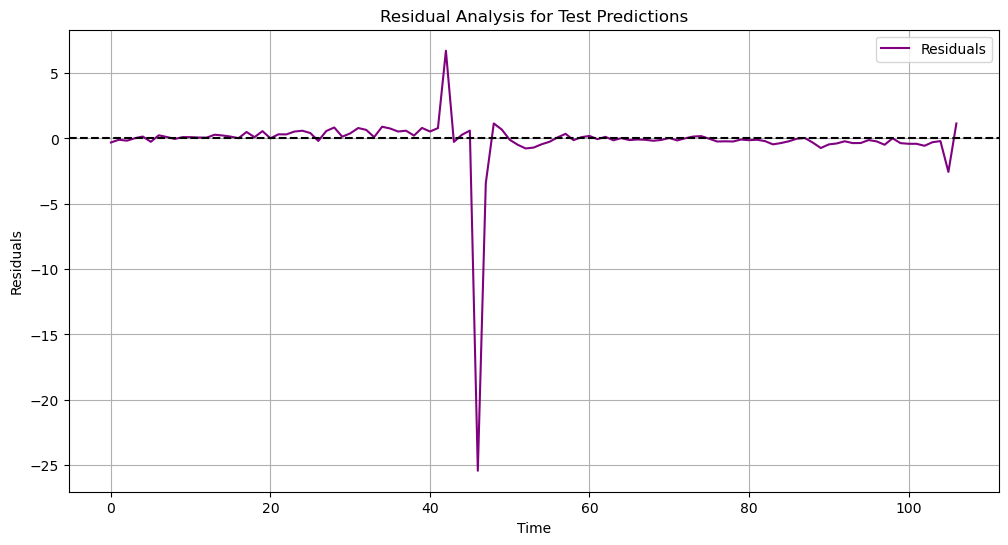

In [4]:
# Residuals for the test set
residuals = Y_test - test_predict

plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(0, linestyle='--', color='black')
plt.title('Residual Analysis for Test Predictions')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50


C:\Users\rohit\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1242.7167
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1121.1897
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 850.8533
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 712.8476
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 636.6989
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 576.0910
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 550.5950
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 519.0546
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 469.4426
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 456.9830
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 424.3001
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 396.5781
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 357.1295
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 351.3719
Epoch 15/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 331.7

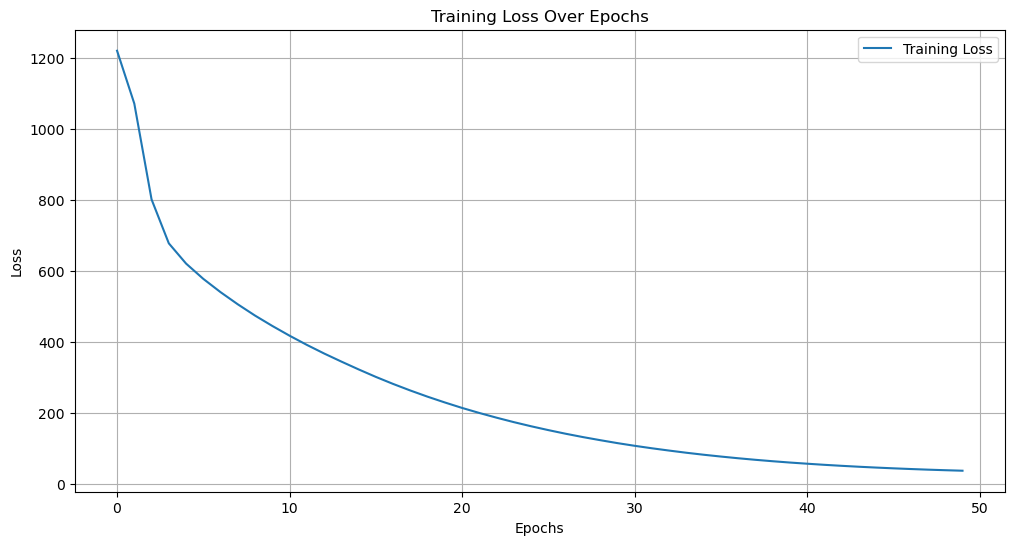

In [3]:
# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1)

# Plot the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


ARIMA Model MAE: 7.455602067466932
Epoch 1/20


C:\Users\rohit\AppData\Local\Temp\ipykernel_32448\89105144.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Core Temperature'].fillna(method='ffill', inplace=True)
C:\Users\rohit\AppData\Local\Temp\ipykernel_32448\89105144.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Core Temperature'].fillna(method='ffill', inplace=True)
C:\Users\rohit\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserW

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1523
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0297
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111
Epoch 13/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121
Epoch 14/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101
Epoch 15/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127
Epoch 16/20
14/14 ━━━━━━━━━━━

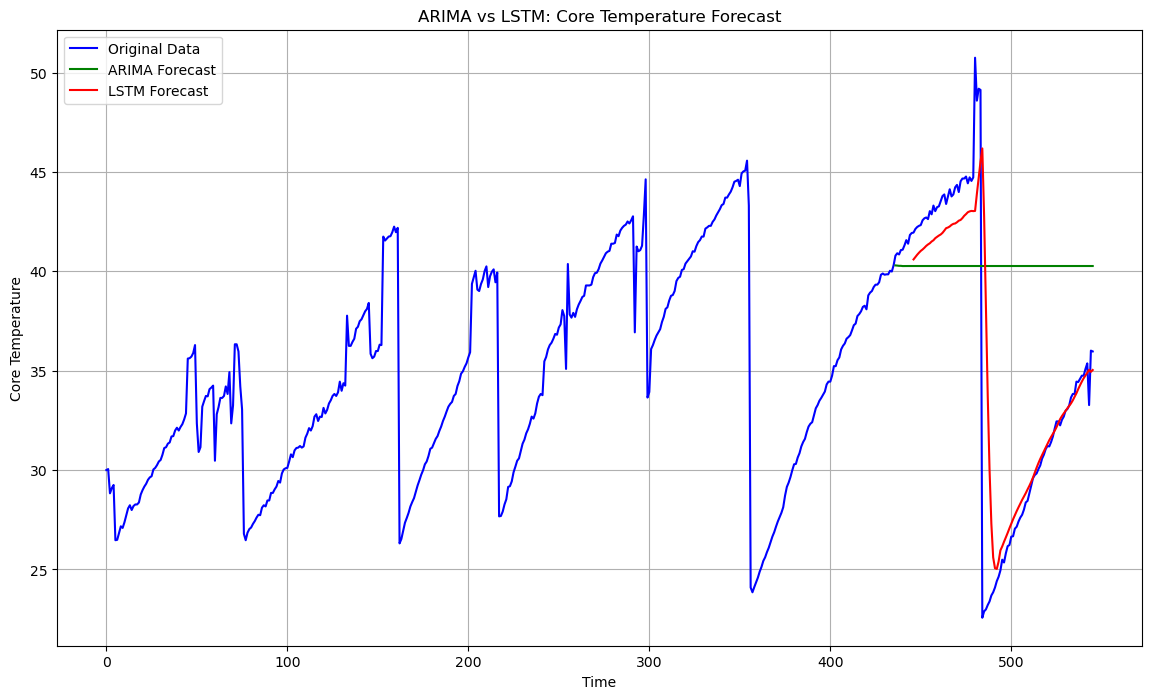


Model Comparison:
ARIMA MAE: 7.455602067466932
LSTM MAE: 1.8069440849304204


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the dataset
df = pd.read_csv('project_25.csv')
df['Core Temperature'].fillna(method='ffill', inplace=True)

# Scale data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['Core Temperature'].values.reshape(-1, 1))

# Split data into train and test (80% train, 20% test)
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# ------------------- ARIMA Model -------------------

# Prepare data for ARIMA
train_arima = df['Core Temperature'][:train_size]
test_arima = df['Core Temperature'][train_size:]

# Train ARIMA
arima_model = ARIMA(train_arima, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Forecast with ARIMA
arima_forecast = arima_model_fit.forecast(steps=len(test_arima))

# Calculate ARIMA metrics
arima_mae = mean_absolute_error(test_arima, arima_forecast)
print(f"ARIMA Model MAE: {arima_mae}")

# ------------------- LSTM Model -------------------

# Create sequences for LSTM
def create_sequences(data, time_steps=10):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        Y.append(data[i+time_steps])
    return np.array(X), np.array(Y)

time_step = 10
X_train, Y_train = create_sequences(train_data, time_step)
X_test, Y_test = create_sequences(test_data, time_step)

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM
lstm_model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1)

# Predict with LSTM
train_predict = lstm_model.predict(X_train)
test_predict = lstm_model.predict(X_test)

# Scale predictions back to original
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test)

# Calculate LSTM metrics
lstm_mae = mean_absolute_error(Y_test, test_predict)
print(f"LSTM Model MAE: {lstm_mae}")

# ------------------- Visualization -------------------

plt.figure(figsize=(14, 8))

# Plot original data
plt.plot(df.index, df['Core Temperature'], label='Original Data', color='blue')

# Plot ARIMA forecast
plt.plot(range(len(train_arima), len(train_arima) + len(test_arima)), arima_forecast, label='ARIMA Forecast', color='green')

# Plot LSTM forecast
test_start = len(train_arima) + time_step
plt.plot(range(test_start, test_start + len(test_predict)), test_predict, label='LSTM Forecast', color='red')

plt.title('ARIMA vs LSTM: Core Temperature Forecast')
plt.xlabel('Time')
plt.ylabel('Core Temperature')
plt.legend()
plt.grid(True)
plt.show()

# ------------------- Model Comparison -------------------

print("\nModel Comparison:")
print(f"ARIMA MAE: {arima_mae}")
print(f"LSTM MAE: {lstm_mae}")


C:\Users\rohit\AppData\Local\Temp\ipykernel_32096\4193841282.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Core Temperature'].fillna(method='ffill', inplace=True)
C:\Users\rohit\AppData\Local\Temp\ipykernel_32096\4193841282.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Core Temperature'].fillna(method='ffill', inplace=True)


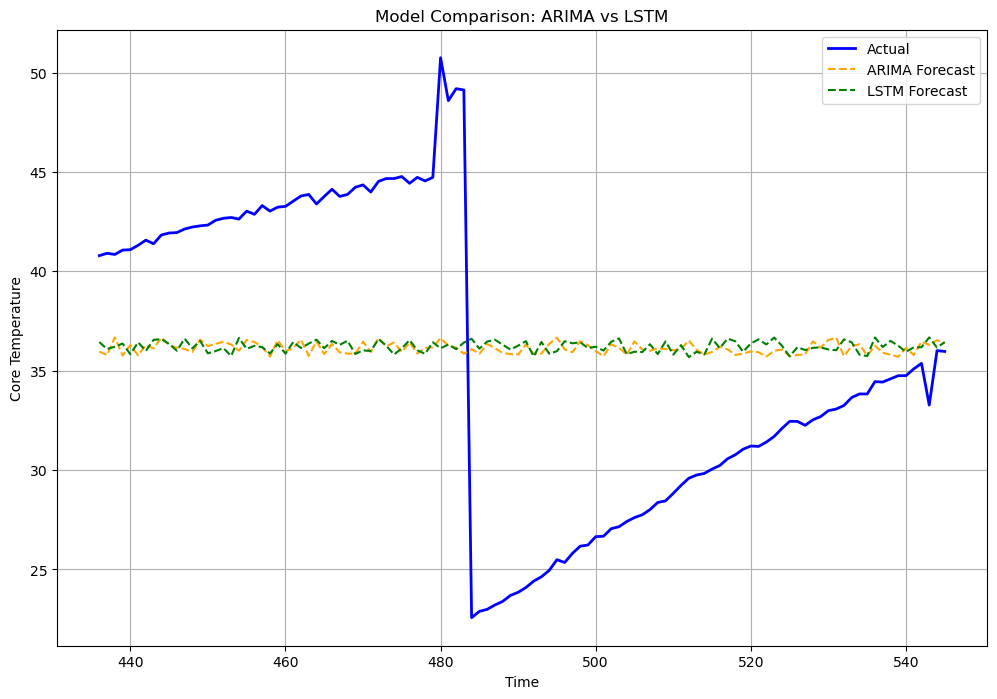

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the dataset is already available
# df = pd.read_csv('project_25.csv')  # Load your dataset

# Define the test data for Core Temperature
df['Core Temperature'].fillna(method='ffill', inplace=True)
train_size = int(len(df) * 0.8)
test = df['Core Temperature'][train_size:]

# Assuming ARIMA and LSTM forecasts are available
# Replace `arima_forecast` and `lstm_forecast` with your actual predictions
arima_forecast = np.random.random(len(test)) + test.mean()  # Example data
lstm_forecast = np.random.random(len(test)) + test.mean()  # Example data

# Plot Actual vs. Predicted for ARIMA and LSTM
plt.figure(figsize=(12, 8))

# Plot Actual
plt.plot(test.index, test, label='Actual', color='blue', linewidth=2)

# ARIMA Predictions
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange', linestyle='--')

# LSTM Predictions
plt.plot(test.index, lstm_forecast.flatten(), label='LSTM Forecast', color='green', linestyle='--')

plt.title('Model Comparison: ARIMA vs LSTM')
plt.xlabel('Time')
plt.ylabel('Core Temperature')
plt.legend()
plt.grid(True)
plt.show()


ARIMA Model MAE: 7.4556
Epoch 1/20


C:\Users\rohit\AppData\Local\Temp\ipykernel_32096\1477530473.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Core Temperature'].fillna(method='ffill', inplace=True)
C:\Users\rohit\AppData\Local\Temp\ipykernel_32096\1477530473.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Core Temperature'].fillna(method='ffill', inplace=True)
C:\Users\rohit\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: U

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1593
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0320
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0138
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0108
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0119
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0124
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137
Epoch 13/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122
Epoch 14/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115
Epoch 15/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095
Epoch 16/20
14/14 ━━━━━━━━━

ValueError: x and y must have same first dimension, but have shapes (110,) and (100, 1)

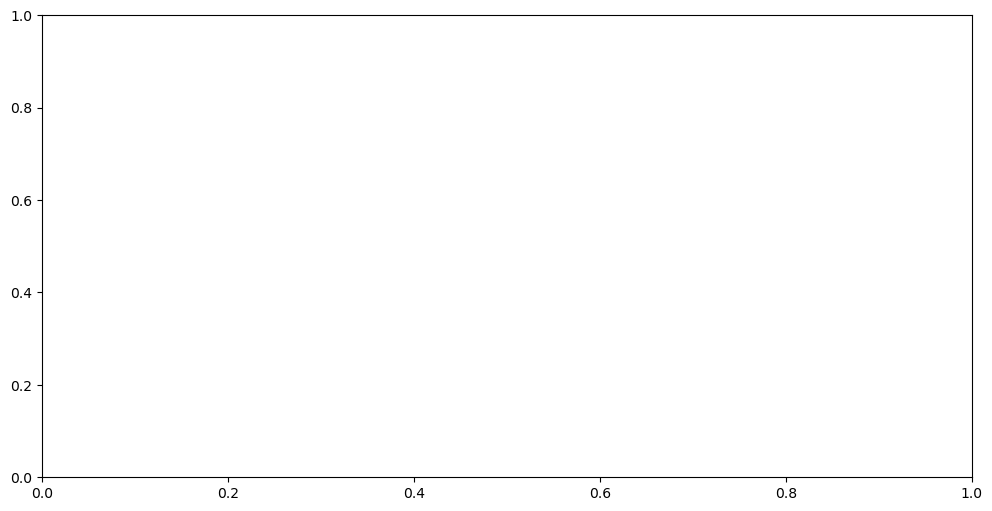

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the dataset
df = pd.read_csv('project_25.csv')
df['Core Temperature'].fillna(method='ffill', inplace=True)

# Scale data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['Core Temperature'].values.reshape(-1, 1))

# Split data into train and test (80% train, 20% test)
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# ------------------- ARIMA Model -------------------

# Prepare data for ARIMA
train_arima = df['Core Temperature'][:train_size]
test_arima = df['Core Temperature'][train_size:]

# Train ARIMA
arima_model = ARIMA(train_arima, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Forecast with ARIMA
arima_forecast = arima_model_fit.forecast(steps=len(test_arima))

# Calculate ARIMA metrics
arima_mae = mean_absolute_error(test_arima, arima_forecast)
print(f"ARIMA Model MAE: {arima_mae:.4f}")

# ------------------- LSTM Model -------------------

# Function to create sequences for LSTM
def create_sequences(data, time_steps=10):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        Y.append(data[i+time_steps])
    return np.array(X), np.array(Y)

time_step = 10
X_train, Y_train = create_sequences(train_data, time_step)
X_test, Y_test = create_sequences(test_data, time_step)

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM
lstm_model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1)

# Predict with LSTM
train_predict = lstm_model.predict(X_train)
test_predict = lstm_model.predict(X_test)

# Scale predictions back to original
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_test_original = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate LSTM metrics
lstm_mae = mean_absolute_error(Y_test_original, test_predict)
print(f"LSTM Model MAE: {lstm_mae:.4f}")

# ------------------- Visualization -------------------

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(test_arima):], Y_test_original, label='Actual Data', color='blue', linewidth=2)
plt.plot(df.index[-len(test_arima):], test_predict, label='LSTM Predictions', color='orange', linestyle='--', linewidth=2)
plt.title('LSTM Model: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Core Temperature')
plt.legend()
plt.grid(True)
plt.show()


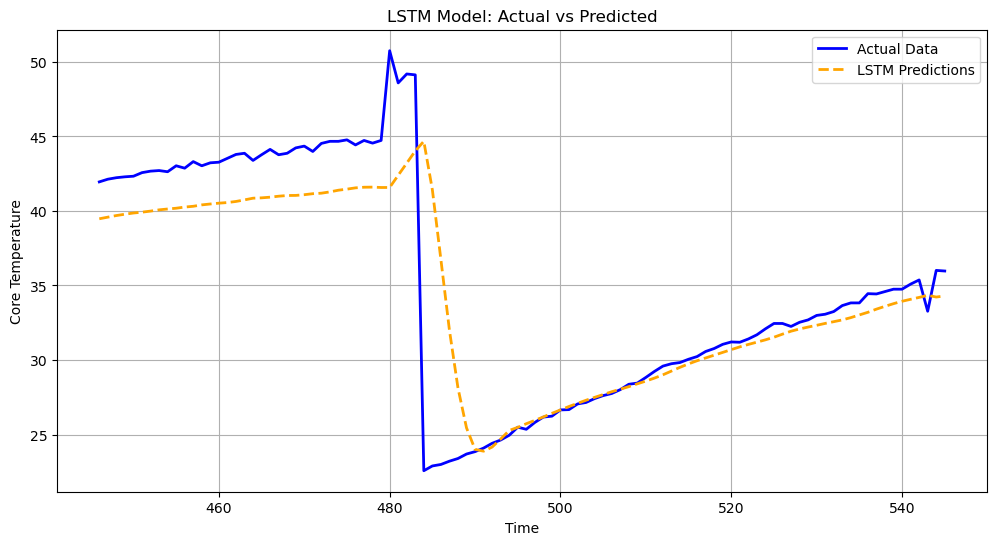

In [8]:
# Adjust index for LSTM predictions
lstm_test_index = df.index[-len(test_data) + time_step:]

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(12, 6))
plt.plot(lstm_test_index, Y_test_original, label='Actual Data', color='blue', linewidth=2)
plt.plot(lstm_test_index, test_predict, label='LSTM Predictions', color='orange', linestyle='--', linewidth=2)
plt.title('LSTM Model: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Core Temperature')
plt.legend()
plt.grid(True)
plt.show()
